<a href="https://colab.research.google.com/github/jsebastianquiroga/Unal_cursos/blob/main/Analitica%20/1_Ana%CC%81lisis%20de%20sentimientos%20con%20R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#=========================================================================================================#
#                  Facultad de Ciencias Económicas - Universidad Nacional de Colombia
#                                 Analítica Cualitativa de Redes Sociales
#                                       Análisis de Sentimientos
#                                                             
#=========================================================================================================#

# Script for Text Mining and Visualization

This script performs the following actions:
1. Clears the current R environment and console.
2. Installs required R packages if they are not already installed.
3. Loads the necessary libraries for text mining, data manipulation, and visualization.

**Packages Installed and Loaded:**
- **tidytext**: Used for text mining and natural language processing.
- **tidyverse**: A collection of R packages for data science.
- **wordcloud**: Creates word cloud visualizations.
- **reshape2**: Reshapes data between wide and long formats.
- **RColorBrewer**: Provides color palettes.
- **readxl**: Reads Excel files.
- **textdata**: Contains text datasets for analysis.

Follow the steps in the code to set up your R environment and load the necessary libraries for your text mining project.


In [1]:
#==============================#
# Limpiar el entorno
rm(list = ls())
# Limpiar la consola: ctrl+L
#==============================#


# Paquetes

install.packages('tidytext')
install.packages('tidyverse')
install.packages('wordcloud')
install.packages('reshape2')
install.packages('RColorBrewer')
install.packages('readxl')
install.packages("textdata")

library(tidytext)
library(tidyverse)
library(wordcloud)
library(reshape2)
library(RColorBrewer)
library(readxl)
library(textdata)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SnowballC’, ‘janeaustenr’, ‘tokenizers’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────

In [12]:
# Importación de datos

setwd('/content/')
datos = read_excel('/content/Tweets.xlsx')
colnames(datos)

[1] "content"     "Sentimiento" "Negativo"    "Neutral"     "Positivo"   
[6] "Final"

# Word Extraction

This section of the script is responsible for extracting words from a text dataset. It uses the `unnest_tokens` function from the `tidytext` package to tokenize the text data into individual words.

**Steps:**
1. The `datos` dataset is specified as the input.
2. The `unnest_tokens` function breaks down the text data into tokens (words).
3. The result is stored in the `table_token` variable, with each word being a separate entry.

**Function Parameters:**
- **tbl**: The input dataset (`datos`).
- **output**: The name of the output column (`word`).
- **input**: The name of the input column containing the text data (`content`).
- **token**: The type of tokenization to perform (`words`).


In [4]:
# Extracción de palabras

table_token = unnest_tokens(tbl = datos,
                              output = 'word',
                              input = 'content',
                              token = 'words')

# Table Dimension and Stop Words Removal

This section of the script checks the dimensions of the tokenized word table and removes common stop words to clean the dataset.

**Steps:**
1. Use the `dim` function to get the dimensions (number of rows and columns) of the `table_token`.
2. Use the `anti_join` function to remove stop words from the `table_token` by joining it with the `stop_words` dataset.

**Function Parameters:**
- **dim**: Returns the dimensions of the table (`table_token`).
- **anti_join**: Removes rows from `table_token` that match the `stop_words` dataset based on the `word` column.


In [5]:
# Dimensión de la tabla con las palabras
dim(table_token)

table_token = anti_join(x = table_token,
                          y = stop_words,
                          by = 'word')


[1] 8311    6

# Word Counting and Visualization

This section of the script counts the occurrences of each word in the dataset, removes unwanted words, and creates a bar plot of word frequencies.

**Steps:**
1. **Count Words**: Use the `count` function to count the occurrences of each word in the `table_token` and sort the results.
2. **Remove Unwanted Words**: Use the `filter` function to remove specific unwanted words (`'https'` and `'t.co'`).
3. **Create Word Frequency Plot**:
   - Count the words again and filter for words that appear more than 10 times.
   - Reorder the words by frequency.
   - Use `ggplot` to create a bar plot of word frequencies with labels.

**Function Parameters:**
- **count**: Counts occurrences of each word and sorts the results.
- **filter**: Removes specified unwanted words.
- **mutate**: Reorders words by frequency for plotting.
- **ggplot**: Creates a bar plot of word frequencies.


word,n
<chr>,<int>
thanksgiving,470
t.co,155
happy,143
https,143
family,54
day,48
tomorrow,36
amp,24
thankful,22


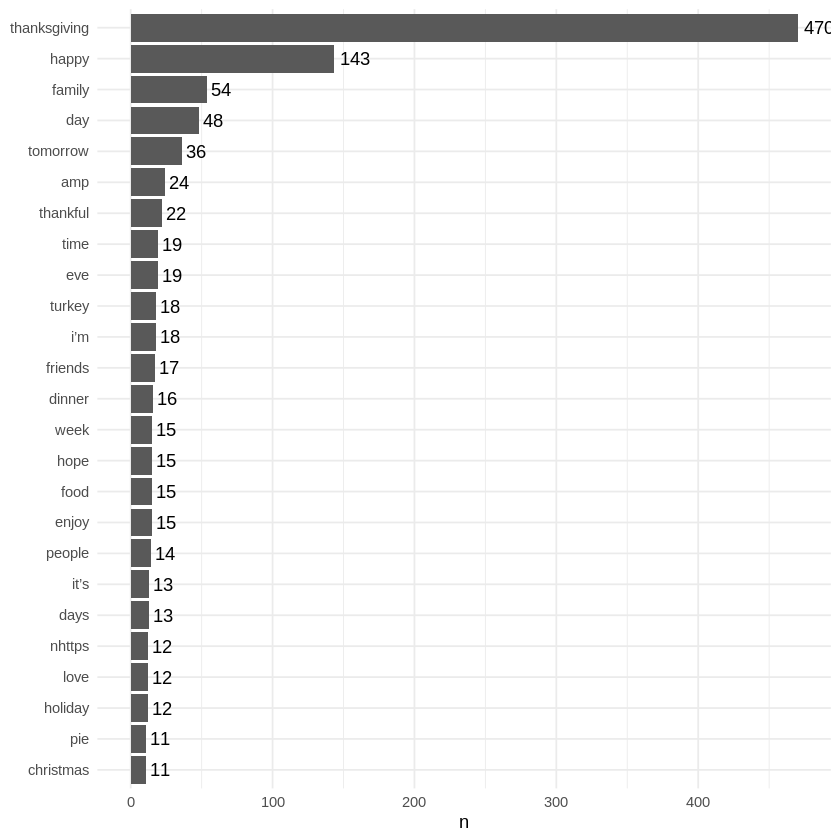

In [6]:
# Contar las palabras
count(table_token,
      word,
      sort = TRUE)

# Eliminar las palabras no útiles
table_token = filter(table_token, word!='https' & word!='t.co')

# Gráfico con la cantidad de palabras
table_token %>%
  count(word, sort = TRUE) %>%
  filter(n > 10) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_text(aes(label=n), hjust= -0.2) +
  geom_col() +
  xlab(NULL) +
  coord_flip()+
  theme_minimal()

# Retrieve Sentiment Words

This section of the script retrieves sentiment words from the `bing` and `nrc` lexicons using the `get_sentiments` function from the `tidytext` package.

**Steps:**
1. **Retrieve Bing Sentiment Words**: Use the `get_sentiments` function to get words with associated sentiments from the `bing` lexicon.
2. **Retrieve NRC Sentiment Words**: Use the `get_sentiments` function to get words with associated sentiments from the `nrc` lexicon.

**Function Parameters:**
- **get_sentiments**: Retrieves words and their associated sentiments from specified lexicons (`bing` and `nrc`).


https://saifmohammad.com/WebPages/AffectIntensity.htm

In [17]:
# Load necessary libraries
library(textdata)
library(tidyverse)

# Unzip the file
unzip("/content/NRC-Emotion-Intensity-Lexicon.zip", exdir = "/content/nrc_emotion")

# List the files in the extracted directory to verify the file names
file_list <- list.files("/content/nrc_emotion", recursive = TRUE)
print(file_list)

# Function to load the NRC lexicon from a local file
load_nrc_lexicon <- function(file_path) {
  nrc <- read.delim(file_path, header = TRUE, stringsAsFactors = FALSE)
  colnames(nrc) <- c("word", "sentiment", "value")
  return(nrc)
}

# Specify the path to one of the emotion files from the extracted content
nrc_file_path <- "/content/nrc_emotion/NRC-Emotion-Intensity-Lexicon/OneFilePerEmotion/anger-NRC-Emotion-Intensity-Lexicon-v1.txt"

# Load the NRC lexicon
nrc_lexicon <- load_nrc_lexicon(nrc_file_path)

# Load the Bing lexicon directly
bing_lexicon <- get_sentiments("bing")

# Visualize the first few rows to ensure they are loaded correctly
head(bing_lexicon)
head(nrc_lexicon)


  [1] "NRC-Emotion-Intensity-Lexicon/ListOfLanguages-For-Which-Lexicon-Availabale.txt"                                 
  [2] "NRC-Emotion-Intensity-Lexicon/NRC-Emotion-Intensity-Lexicon-v1-ForVariousLanguages-withZeroIntensityEntries.txt"
  [3] "NRC-Emotion-Intensity-Lexicon/NRC-Emotion-Intensity-Lexicon-v1-ForVariousLanguages.txt"                         
  [4] "NRC-Emotion-Intensity-Lexicon/NRC-Emotion-Intensity-Lexicon-v1.txt"                                             
  [5] "NRC-Emotion-Intensity-Lexicon/OneFilePerEmotion/anger-NRC-EmoIntv1-withZeroIntensityEntries.txt"                
  [6] "NRC-Emotion-Intensity-Lexicon/OneFilePerEmotion/anger-NRC-Emotion-Intensity-Lexicon-v1.txt"                     
  [7] "NRC-Emotion-Intensity-Lexicon/OneFilePerEmotion/anticipation-NRC-EmoIntv1-withZeroIntensityEntries.txt"         
  [8] "NRC-Emotion-Intensity-Lexicon/OneFilePerEmotion/anticipation-NRC-Emotion-Intensity-Lexicon-v1.txt"              
  [9] "NRC-Emotion-Intensity-Lexicon/One

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative


,word,sentiment,value
,<chr>,<dbl>,<lgl>
1,brutality,0.959,NA
2,hatred,0.953,NA
3,hateful,0.940,NA
4,terrorize,0.939,NA
5,violently,0.938,NA
6,infuriated,0.938,NA


# Match and Count Sentiment Words

This section of the script matches the words from our data with the sentiment words from the Bing and NRC lexicons and counts the occurrences of these words.

**Steps:**
1. **Match Bing Sentiment Words**: Use the `inner_join` function to match words in `table_token` with words in the Bing lexicon.
2. **Match NRC Sentiment Words**: Use the `inner_join` function to match words in `table_token` with words in the NRC lexicon.
3. **Count Bing Sentiment Words**: Use the `count` function to count the occurrences of each word and its associated sentiment from the Bing lexicon.
4. **Count NRC Sentiment Words**: Use the `count` function to count the occurrences of each word and its associated sentiment from the NRC lexicon.

**Function Parameters:**
- **inner_join**: Joins two tables on matching keys.
- **count**: Counts occurrences of each word and sentiment.

In [20]:
# Unzip the file
unzip("/content/NRC-Emotion-Intensity-Lexicon.zip", exdir = "/content/nrc_emotion")

# List the files in the extracted directory to verify the file names
file_list <- list.files("/content/nrc_emotion", recursive = TRUE)
print(file_list)

# Function to load the NRC lexicon from a local file
load_nrc_lexicon <- function(file_path) {
  nrc <- read.delim(file_path, header = TRUE, stringsAsFactors = FALSE)
  colnames(nrc) <- c("word", "sentiment", "value")
  return(nrc)
}

# Specify the path to one of the emotion files from the extracted content
nrc_file_path <- "/content/nrc_emotion/NRC-Emotion-Intensity-Lexicon/OneFilePerEmotion/anger-NRC-Emotion-Intensity-Lexicon-v1.txt"

# Load the NRC lexicon
nrc_lexicon <- load_nrc_lexicon(nrc_file_path)

# Load the Bing lexicon directly
bing_lexicon <- get_sentiments("bing")

# Display the first few rows to ensure they are loaded correctly
head(bing_lexicon)
head(nrc_lexicon)

# Relacionar las palabras de nuestros datos con las palabras de bing
table_bing <- table_token %>%
  inner_join(bing_lexicon, by = "word")

# Relacionar las palabras de nuestros datos con las palabras de nrc
table_nrc <- table_token %>%
  inner_join(nrc_lexicon, by = "word")

# Contar las palabras con bing
table_bing %>%
  count(word, sentiment, sort = TRUE)

# Contar las palabras con nrc
table_nrc %>%
  count(word, sentiment, sort = TRUE)


  [1] "NRC-Emotion-Intensity-Lexicon/ListOfLanguages-For-Which-Lexicon-Availabale.txt"                                 
  [2] "NRC-Emotion-Intensity-Lexicon/NRC-Emotion-Intensity-Lexicon-v1-ForVariousLanguages-withZeroIntensityEntries.txt"
  [3] "NRC-Emotion-Intensity-Lexicon/NRC-Emotion-Intensity-Lexicon-v1-ForVariousLanguages.txt"                         
  [4] "NRC-Emotion-Intensity-Lexicon/NRC-Emotion-Intensity-Lexicon-v1.txt"                                             
  [5] "NRC-Emotion-Intensity-Lexicon/OneFilePerEmotion/anger-NRC-EmoIntv1-withZeroIntensityEntries.txt"                
  [6] "NRC-Emotion-Intensity-Lexicon/OneFilePerEmotion/anger-NRC-Emotion-Intensity-Lexicon-v1.txt"                     
  [7] "NRC-Emotion-Intensity-Lexicon/OneFilePerEmotion/anticipation-NRC-EmoIntv1-withZeroIntensityEntries.txt"         
  [8] "NRC-Emotion-Intensity-Lexicon/OneFilePerEmotion/anticipation-NRC-Emotion-Intensity-Lexicon-v1.txt"              
  [9] "NRC-Emotion-Intensity-Lexicon/One

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative


,word,sentiment,value
,<chr>,<dbl>,<lgl>
1,brutality,0.959,NA
2,hatred,0.953,NA
3,hateful,0.940,NA
4,terrorize,0.939,NA
5,violently,0.938,NA
6,infuriated,0.938,NA


word,sentiment,n
<chr>,<chr>,<int>
happy,positive,143
thankful,positive,22
enjoy,positive,15
love,positive,12
grateful,positive,9
wonderful,positive,8
celebrate,positive,7
free,positive,7
safe,positive,7


word,sentiment,n
<chr>,<dbl>,<int>
shit,0.573,5
bad,0.453,4
damn,0.735,4
feeling,0.147,3
spam,0.281,3
bitch,0.803,2
enemy,0.667,2
fear,0.500,2
hate,0.828,2


# Visualization of Positive and Negative Words from Bing Lexicon

This section of the script creates a bar plot to visualize the top 15 positive and negative words from the Bing lexicon and lists the unique sentiment categories from the NRC lexicon.

**Steps:**
1. **Plot Positive and Negative Words**:
   - Count the occurrences of each word and sentiment from the Bing lexicon.
   - Group the data by sentiment.
   - Select the top 15 words for each sentiment.
   - Reorder the words by frequency.
   - Use `ggplot` to create a bar plot, with different colors for positive and negative sentiments.
   - Add labels to the bars and arrange the plot with `facet_wrap` and `coord_flip`.

2. **List NRC Sentiment Categories**:
   - Use the `unique` function to list all unique sentiment categories present in the `table_nrc`.

**Function Parameters:**
- **count**: Counts occurrences of each word and sentiment.
- **group_by**: Groups data by sentiment.
- **top_n**: Selects the top n rows for each group.
- **ungroup**: Removes grouping.
- **mutate**: Reorders words by frequency.
- **ggplot**: Creates a bar plot.
- **facet_wrap**: Creates separate panels for each sentiment.
- **coord_flip**: Flips the coordinate system for better readability.
- **unique**: Lists unique values in a column.


Selecting by n


[1] 0.706 0.672 0.344 0.765 0.250 0.470 0.481 0.266 0.828 0.853 0.868 0.453
[13] 0.735 0.688 0.573 0.667 0.418 0.758 0.062 0.435 0.545 0.529 0.500 0.147
[25] 0.484 0.469 0.574 0.364 0.803 0.337 0.630 0.281 0.719 0.561 0.766 0.409
[37] 0.577 0.175 0.734 0.234 0.404 0.338 0.176

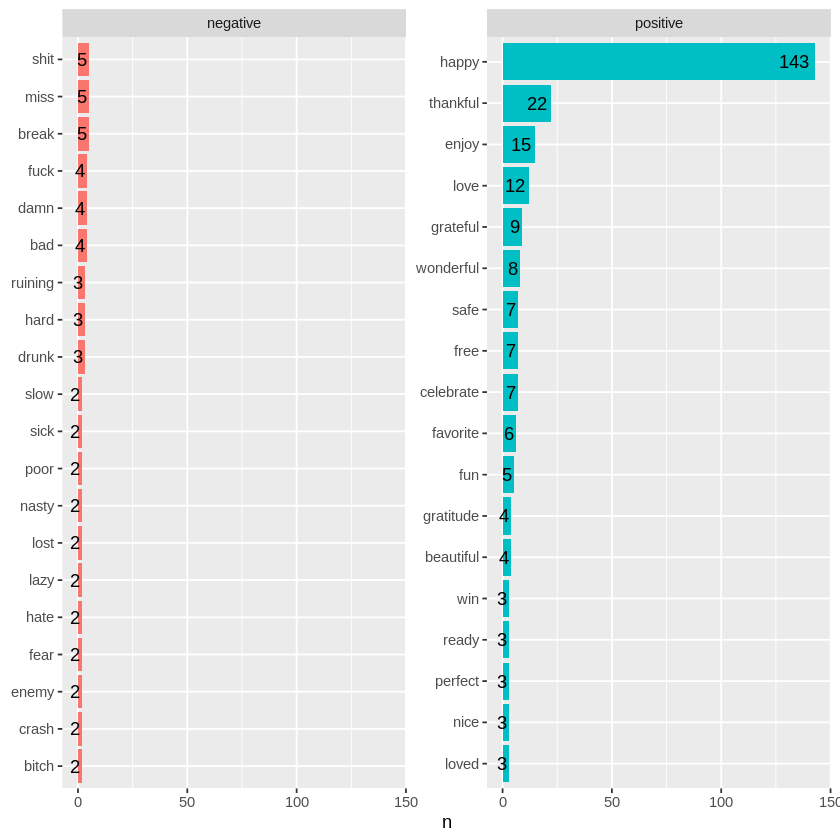

In [21]:
# Gráfico con las palabras negativas y postivas de bing
table_bing %>%
  count(word,sentiment,sort=TRUE) %>%
  group_by(sentiment) %>%
  top_n(15) %>%
  ungroup() %>%
  mutate(word=reorder(word,n)) %>%
  ggplot(aes(word,n,fill=sentiment))+
  geom_col(show.legend = FALSE)+
  geom_text(aes(label=n), hjust= 1.2) +
  facet_wrap(~sentiment,scales = 'free_y') +
  coord_flip() +
  xlab(NULL)

# Categorías nrc
unique(table_nrc$sentiment)

# Visualization of NRC Sentiment Categories

This section of the script creates bar plots to visualize the top words associated with different NRC sentiment categories. It includes separate plots for sentiments excluding positive and negative, and a dedicated plot for positive and negative sentiments.

**Steps:**
1. **Plot Words for NRC Sentiment Categories (Excluding Positive and Negative)**:
   - Filter out `positive` and `negative` sentiments.
   - Count the occurrences of each word and sentiment.
   - Group the data by sentiment and select the top 5 words for each sentiment.
   - Reorder the words by frequency.
   - Use `ggplot` to create a bar plot with different colors for each sentiment.
   - Add labels to the bars and arrange the plot with `facet_wrap` and `coord_flip`.

2. **Plot Words for Positive and Negative Sentiments from NRC**:
   - Filter for `positive` and `negative` sentiments.
   - Count the occurrences of each word and sentiment.
   - Group the data by sentiment and select the top 5 words for each sentiment.
   - Reorder the words by frequency.
   - Use `ggplot` to create a bar plot with different colors for each sentiment.
   - Add labels to the bars and arrange the plot with `facet_wrap` and `coord_flip`.

**Function Parameters:**
- **filter**: Filters rows based on specified conditions.
- **count**: Counts occurrences of each word and sentiment.
- **group_by**: Groups data by sentiment.
- **top_n**: Selects the top n rows for each group.
- **ungroup**: Removes grouping.
- **mutate**: Reorders words by frequency.
- **ggplot**: Creates a bar plot.
- **facet_wrap**: Creates separate panels for each sentiment.
- **coord_flip**: Flips the coordinate system for better readability.


Selecting by n
Selecting by n
ERROR while rich displaying an object: Error in `combine_vars()`:
! Faceting variables must have at least one value.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7

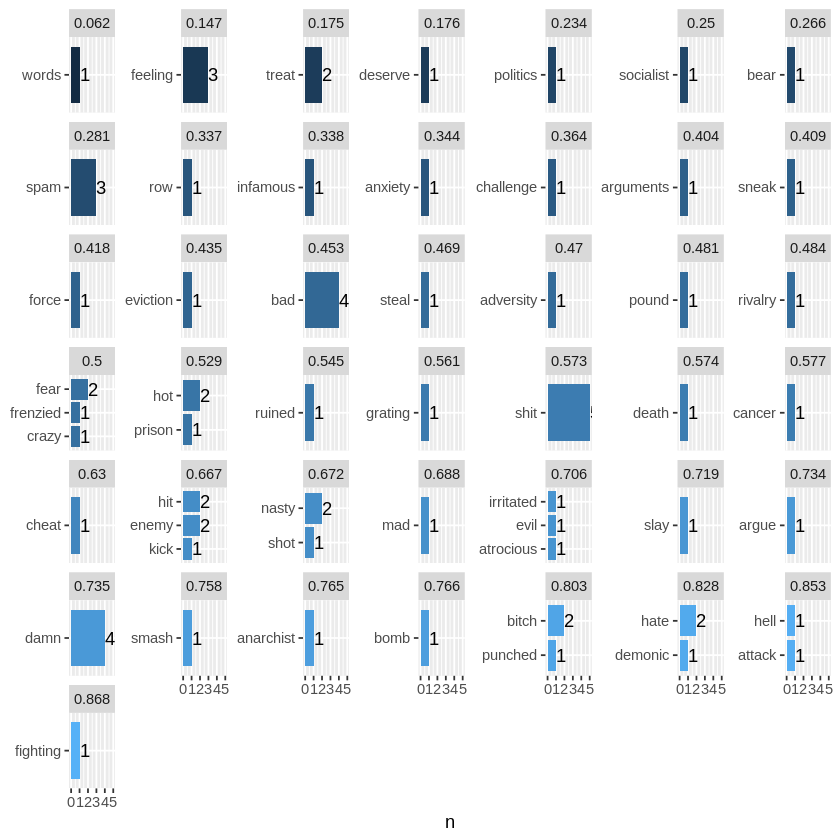

In [22]:
# Gráfica por categorías nrc
table_nrc %>%
  filter(sentiment!='negative' & sentiment!='positive') %>%
  count(word,sentiment,sort=TRUE) %>%
  group_by(sentiment) %>%
  top_n(5) %>%
  ungroup() %>%
  mutate(word=reorder(word,n)) %>%
  ggplot(aes(word,n,fill=sentiment))+
  geom_col(show.legend = FALSE) +
  geom_text(aes(label=n), hjust= 0) +
  facet_wrap(~sentiment,scales = 'free_y')+
  coord_flip() +
  xlab(NULL)


# Gráfico con las palabras negativas y postivas de nrc
table_nrc %>%
  filter(sentiment=='negative' | sentiment=='positive') %>%
  count(word,sentiment,sort=TRUE) %>%
  group_by(sentiment) %>%
  top_n(5) %>%
  ungroup() %>%
  mutate(word=reorder(word,n)) %>%
  ggplot(aes(word,n,fill=sentiment))+
  geom_col(show.legend = FALSE) +
  geom_text(aes(label=n), hjust= 0) +
  facet_wrap(~sentiment,scales = 'free_y')+
  coord_flip() +
  xlab(NULL)

# Word Cloud Visualization

This section of the script creates a word cloud to visualize the frequency of words in the dataset. A word cloud is a graphical representation where the size of each word indicates its frequency or importance.

**Steps:**
1. **Count Word Frequencies**: Use the `count` function to count the occurrences of each word in the `table_token`.
2. **Create Word Cloud**:
   - Use the `wordcloud` function to generate the word cloud.
   - Set parameters for the word cloud such as `max.words`, `scale`, `rot.per`, `random.order`, and `colors` to customize the appearance.

**Function Parameters:**
- **count**: Counts occurrences of each word.
- **wordcloud**: Generates the word cloud.
  - **words**: The words to be displayed.
  - **freq**: The frequencies of the words.
  - **max.words**: The maximum number of words to display.
  - **scale**: The range of sizes for the words.
  - **rot.per**: The proportion of words that should be rotated.
  - **random.order**: Whether words should be plotted in random order.
  - **colors**: The color palette to use for the words.


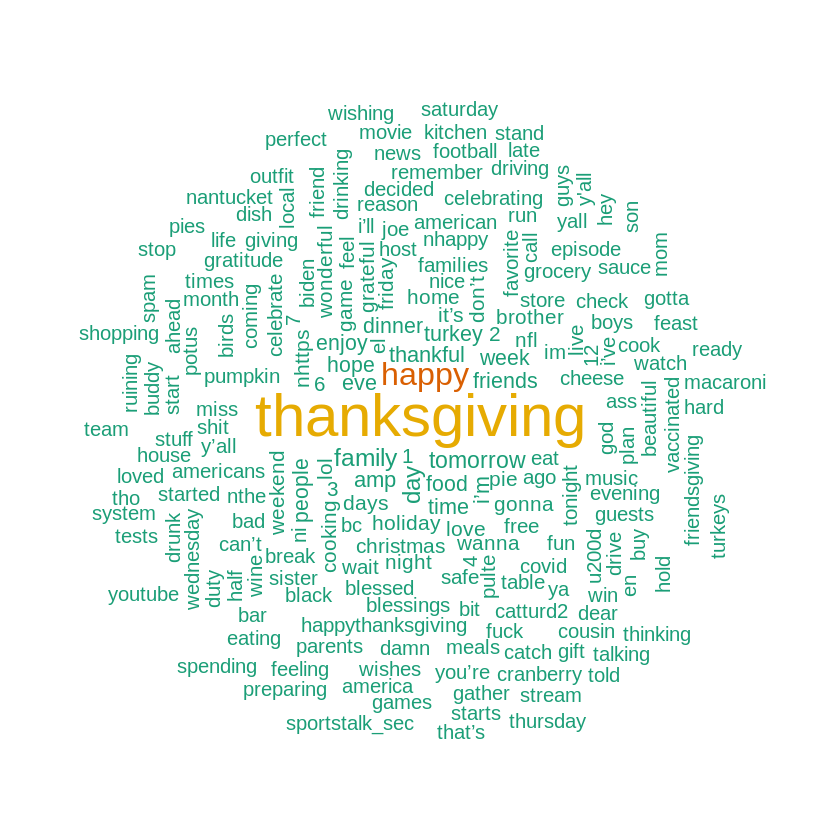

In [23]:
# Nube de palabras
table_token %>%
  count(word) %>%
  with(wordcloud(words=word,
                 freq=n,
                 max.words = 250,
                 scale = c(3,1),
                 rot.per = 0.3,
                 random.order = FALSE,
                 colors=brewer.pal(6,'Dark2')))

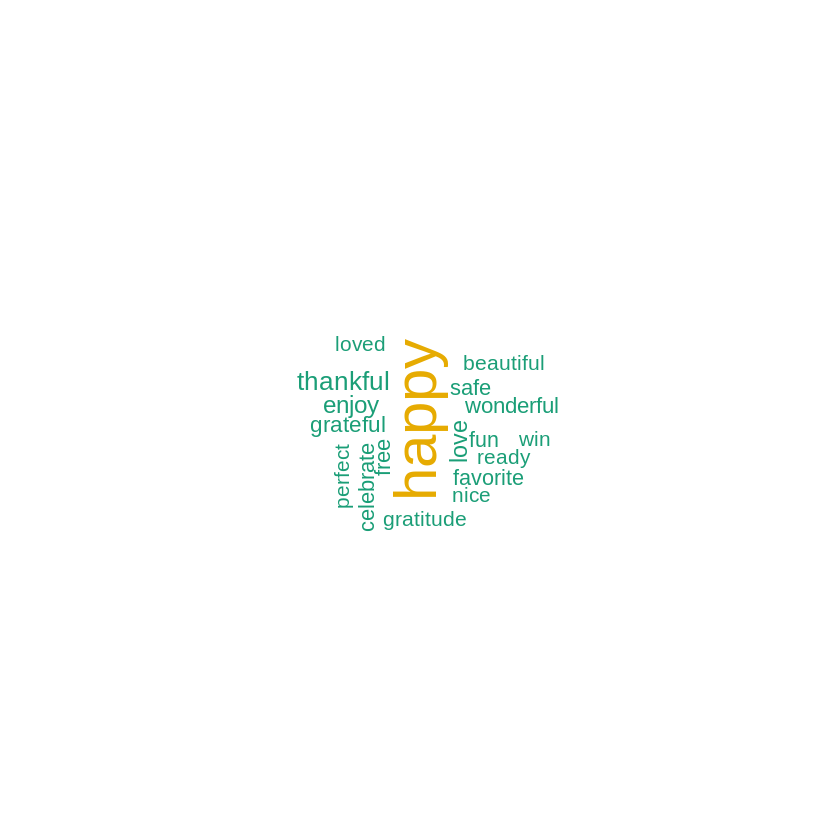

In [24]:
# Nube de palabras positivas de bing
table_bing%>%
  count(word,sentiment) %>%
  filter(sentiment=='positive') %>%
  with(wordcloud(words=word,
                 freq=n,
                 max.words = 250,
                 scale = c(3,1),
                 rot.per = 0.3,
                 random.order = FALSE,
                 colors=brewer.pal(6,'Dark2')))

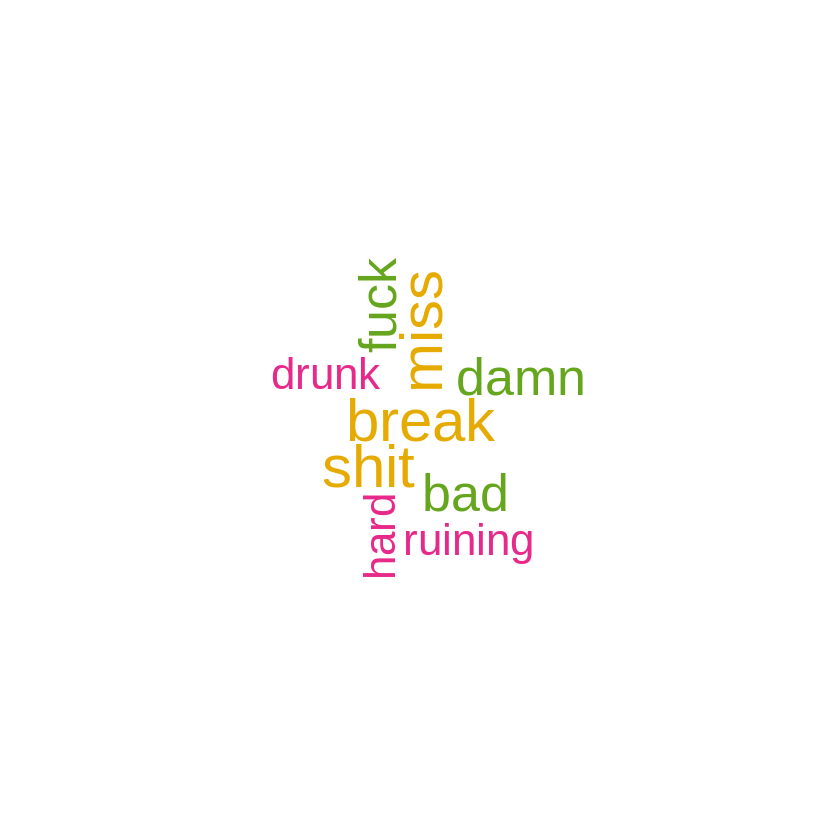

In [25]:
# Nube de palabras negativas de bing
table_bing%>%
  count(word,sentiment) %>%
  filter(sentiment=='negative') %>%
  with(wordcloud(words=word,
                 freq=n,
                 max.words = 250,
                 scale = c(3,1),
                 rot.per = 0.3,
                 random.order = FALSE,
                 colors=brewer.pal(6,'Dark2')))



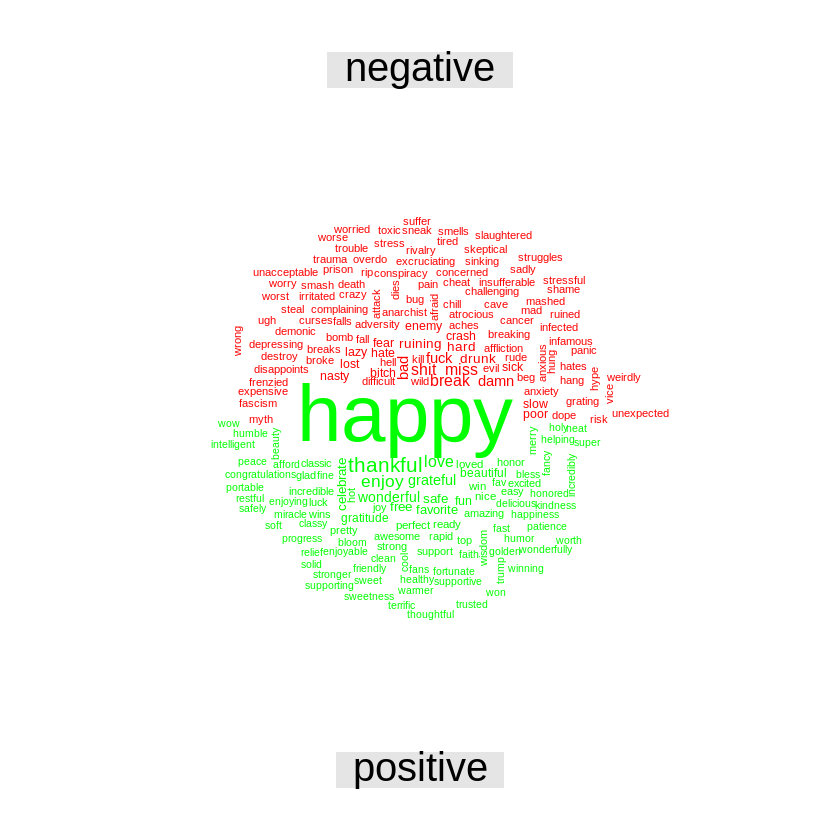

In [26]:
# Nube de palabras positivas y negativas (comparación) de bing
table_bing %>%
  count(word,sentiment,sort=TRUE) %>%
  acast(word~sentiment,value.var = 'n', fill = 0) %>%
  comparison.cloud(colors = c('red','green'),
                   max.words = 300,
                   title.size = 2)




# Word Cloud by NRC Sentiment Categories

This section of the script creates a comparison word cloud to visualize the frequency of words by NRC sentiment categories, excluding positive and negative sentiments. A comparison word cloud allows for the comparison of word frequencies across different categories.

**Steps:**
1. **Count Word Frequencies by Sentiment**: Use the `count` function to count the occurrences of each word and sentiment in the `table_nrc`.
2. **Filter Sentiments**: Exclude the `positive` and `negative` sentiments.
3. **Create a Comparison Cloud**:
   - Use the `acast` function to reshape the data into a format suitable for the `comparison.cloud` function.
   - Generate the comparison word cloud with `comparison.cloud`.

**Function Parameters:**
- **count**: Counts occurrences of each word and sentiment.
- **filter**: Filters rows based on specified conditions.
- **acast**: Reshapes the data into a wide format for comparison.
- **comparison.cloud**: Generates a comparison word cloud.
  - **title.size**: Sets the size of the title.


Warning message in brewer.pal(max(3, ncol(term.matrix)), "Dark2"):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”
Warning message in comparison.cloud(., title.size = 1.5):
“arguments could not be fit on page. It will not be plotted.”
Warning message in comparison.cloud(., title.size = 1.5):
“bomb could not be fit on page. It will not be plotted.”
Warning message in comparison.cloud(., title.size = 1.5):
“cancer could not be fit on page. It will not be plotted.”
Warning message in comparison.cloud(., title.size = 1.5):
“challenge could not be fit on page. It will not be plotted.”
Warning message in comparison.cloud(., title.size = 1.5):
“cheat could not be fit on page. It will not be plotted.”
Warning message in comparison.cloud(., title.size = 1.5):
“death could not be fit on page. It will not be plotted.”
Warning message in comparison.cloud(., title.size = 1.5):
“deserve could not be fit on page. It will not be plotted.

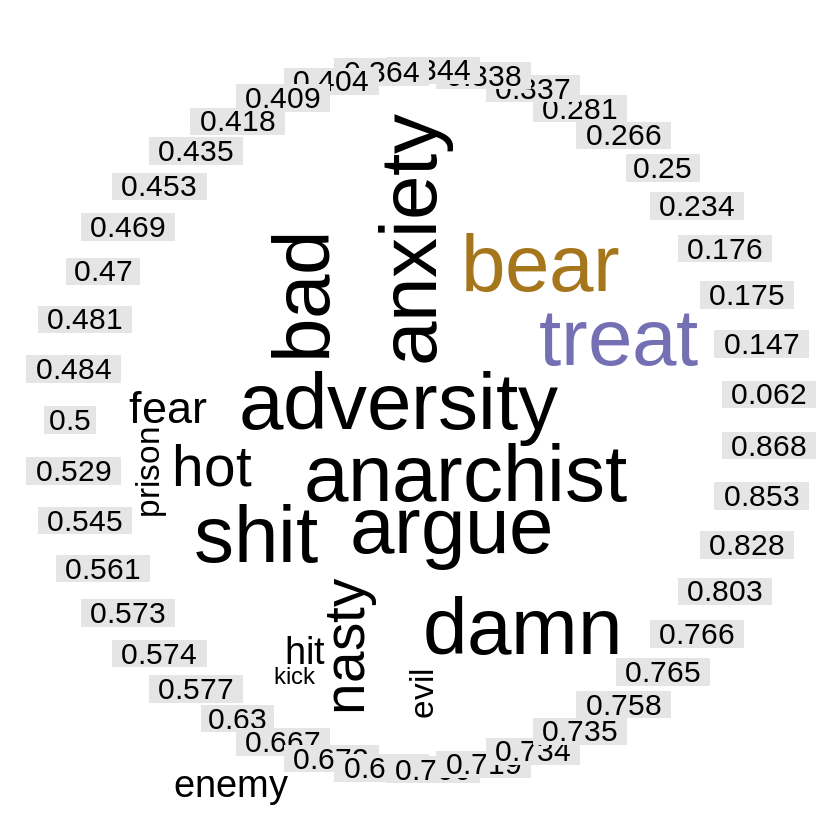

In [27]:
# Nube de palabras por categorías de nrc
table_nrc %>%
  count(word,sentiment,sort=TRUE) %>%
  filter(sentiment!='positive' & sentiment!='negative') %>%
  acast(word~sentiment,value.var = 'n', fill = 0) %>%
  comparison.cloud(title.size = 1.5)
